### Importing of libraries

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta
import re
sns.set()

### Load and Read the different data sets 

In [240]:
cab = pd.read_csv("DataSets/Cab_Data.csv")
display(cab.head(3))

city = pd.read_csv("DataSets/City.csv")
display(city.head(2))

customer_id = pd.read_csv("DataSets/Customer_ID.csv")
display(customer_id.head(2))

transaction_id =pd.read_csv("DataSets/Transaction_ID.csv")
display(transaction_id.head(2))

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card


In [294]:
cab.shape, customer_id.shape, transaction_id.shape, city.shape

((359392, 7), (49171, 4), (440098, 3), (20, 3))

### Join Cab_Data and City
Cab and City data sets have the feature `City` on common. Then, I will join Cab versus City data sets

In [241]:
cab_city = pd.merge(cab, city, how = 'inner', on = ['City'])

### Join Transaction_ID and Customer_ID
Transaction_ID and Customer_ID have the feature `Customer ID` in common. Therefore, I will merge Transaction_ID versus Customer_ID

In [242]:
transaction_customer = pd.merge(transaction_id, customer_id, how='inner', on = ['Customer ID'])

### Create a master data 
Here I will merge the cab_city and transaction_customer data sets in order to create the master data

In [243]:
master_data = pd.merge(cab_city, transaction_customer, how = 'inner', on = 'Transaction ID')

In [244]:
display(master_data.head(2))

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card,Male,27,9237


In [245]:
master_data.shape

(359392, 14)

#### Feature Transformation
##### Create `Profit` variable

Profit is the revenue from the business. It will be calculated as `Price Charged - Cost of Trip`.

I define a simple function that will return the difference of two variable taken by considering an order.

In [246]:
def sub_num_features(a, b):
    return a-b

In [247]:
master_data['Profit'] = master_data[['Price Charged', 'Cost of Trip']].apply(lambda x: sub_num_features(x.iloc[0], x.iloc[1]), axis =1 )

In [248]:
master_data.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card,Male,28,10813,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card,Male,27,9237,23.666


In [249]:
master_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Population', 'Users', 'Customer ID',
       'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)', 'Profit'],
      dtype='object')

In [250]:
master_data['Population'].describe()

count          359392
unique             19
top        8,405,837 
freq            99885
Name: Population, dtype: object

##### Convert `Users`, `Population` from `object` type to `float` type
I will define two functions. One will clean text by removing space and coma, and return the digits. 
The second one will convert string to numeric.

In [251]:
def object_2_numeric(text):
    return float(str(text))

def clean_text(text):
    numb = re.findall(r'[0-9]*', text)
    numb = ''.join(numb)
    return numb

In [252]:
master_data["Population"] = master_data["Population"].apply(lambda x: object_2_numeric(clean_text(x)))
master_data['Users'] = master_data["Users"].apply(lambda x: object_2_numeric(clean_text(x)))

##### Formating the datetime

In [253]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [254]:
master_data['Date of Travel'] = master_data['Date of Travel'].apply(lambda x:to_date_format(x))
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885.0,24701.0,29290,Card,Male,28,10813,57.315
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885.0,24701.0,27703,Card,Male,27,9237,23.666
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885.0,24701.0,28712,Cash,Male,53,11242,27.568
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885.0,24701.0,28020,Cash,Male,23,23327,25.798
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885.0,24701.0,27182,Card,Male,33,8536,16.844


### Exploratory Data Analysis

#### 1- Statistical Analysis

##### 1.1- Descriptive Analysis (Univariate analysis)
##### 1.1.1 - Check missing value

In [255]:
master_data.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Profit                0
dtype: int64

There is no missing in the master data set.

##### 1.1.2- Data types

In [256]:
master_data.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Population                   float64
Users                        float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Profit                       float64
dtype: object


##### 1.1.3- Statistical Descriptive


In [257]:
master_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Age,Income (USD/Month),Profit
count,3.593920e+05,359392,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,2017-08-16 01:37:55.042294016,22.567254,423.443311,286.190113,3.132198e+06,158365.582267,19191.652115,35.336705,15048.822937,137.253198
min,1.000001e+07,2016-01-01 00:00:00,1.900000,15.600000,19.000000,2.489680e+05,3643.000000,1.000000,18.000000,2000.000000,-220.060000
25%,1.011081e+07,2016-11-22 00:00:00,12.000000,206.437500,151.200000,6.712380e+05,80021.000000,2705.000000,25.000000,8424.000000,28.012000
50%,1.022104e+07,2017-09-09 00:00:00,22.440000,386.360000,282.480000,1.595037e+06,144132.000000,7459.000000,33.000000,14685.000000,81.962000
75%,1.033094e+07,2018-05-11 00:00:00,32.960000,583.660000,413.683200,8.405837e+06,302149.000000,36078.000000,42.000000,21035.000000,190.030000
max,1.044011e+07,2018-12-30 00:00:00,48.000000,2048.030000,691.200000,8.405837e+06,302149.000000,60000.000000,65.000000,35000.000000,1463.966000
std,1.268058e+05,NaN,12.233526,274.378911,157.993661,3.315194e+06,100850.051020,21012.412463,12.594234,7969.409482,160.311840


Above, this is the result of statistical descriptive for numerical features.

In [258]:
master_data.describe(exclude=['int64', 'float64', 'datetime'])

,Company,City,Payment_Mode,Gender
count,359392,359392,359392,359392
unique,2,19,2,2
top,Yellow Cab,NEW YORK NY,Card,Male
freq,274681,99885,215504,205912


Above, this is the result of statistical descriptive for categorical features.

##### 1.1.4- Histograms
Gender

Text(0.5, 1.0, 'Gender Count')

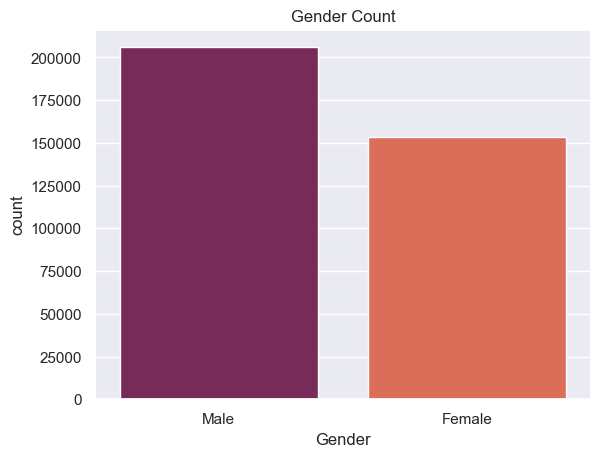

In [259]:
sns.countplot(data = master_data, x ='Gender', palette = 'rocket')
plt.title("Gender Count")

Payment Mode

Text(0.5, 1.0, 'Payment_Mode Count')

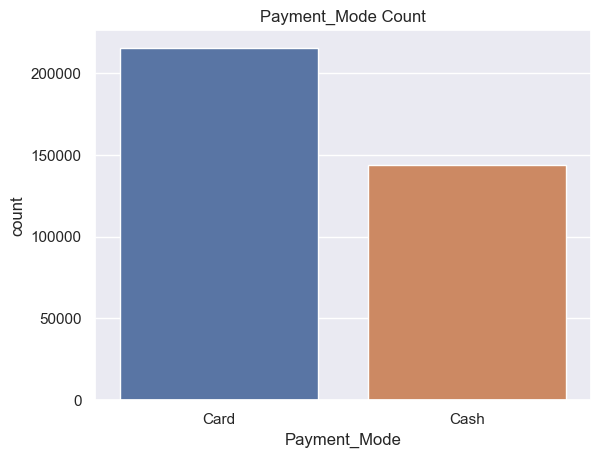

In [260]:
sns.countplot(data = master_data, x= 'Payment_Mode')
plt.title('Payment_Mode Count')

Company

Text(0.5, 1.0, 'Company Count')

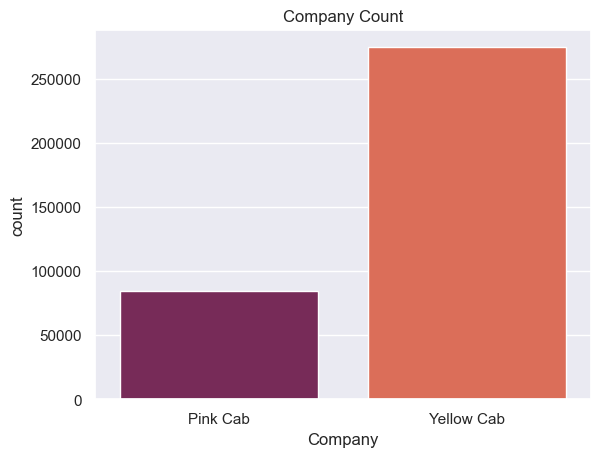

In [261]:
sns.countplot(data = master_data, x= 'Company', palette = 'rocket')
plt.title('Company Count')

KM Travelled

Text(0.5, 1.0, 'KM Travelled Distribution')

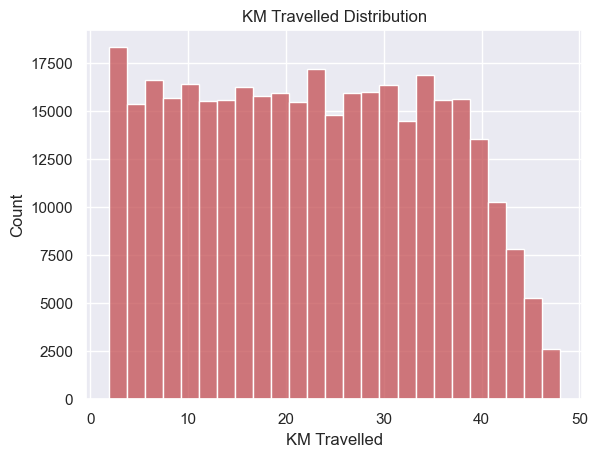

In [262]:
sns.histplot(data = master_data, x = 'KM Travelled', bins = 25, color='r' )
plt.title('KM Travelled Distribution')

Few people travelled for long distance (apart from 44 km)

Age

Text(0.5, 1.0, 'Age Distribution')

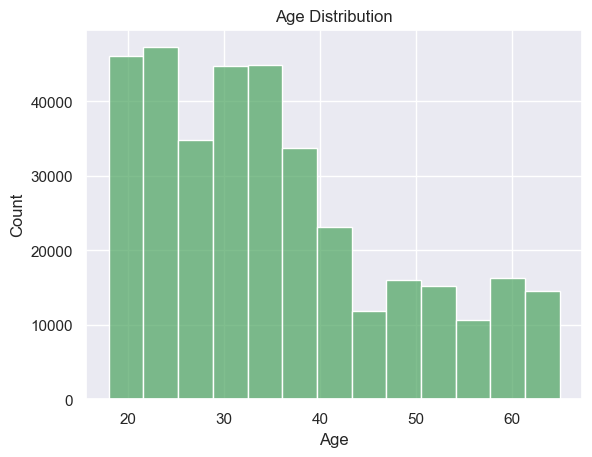

In [263]:
sns.histplot(data = master_data, x = 'Age', bins = 13, color='g' )
plt.title('Age Distribution')

I notice that young people travel a lot than old people

##### 1.1.5- Outliers treatment

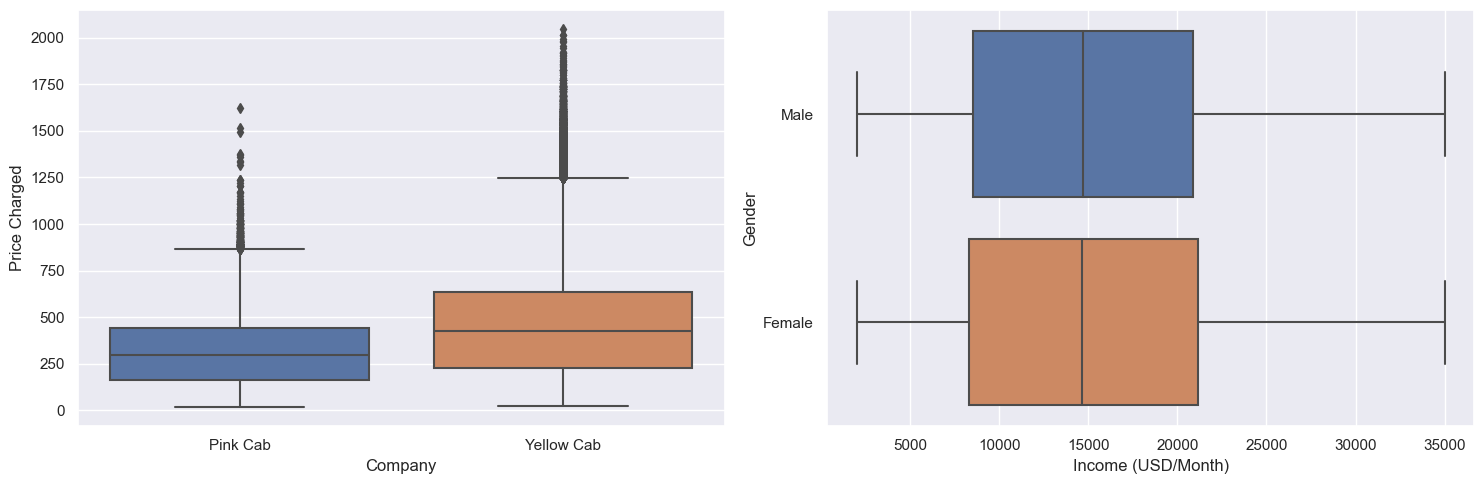

In [264]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.boxplot(data=master_data, x = 'Company', y='Price Charged', dodge=False)

plt.subplot(1,2,2)
sns.boxplot(data = master_data, y = 'Gender', x = "Income (USD/Month)", dodge=False)

plt.tight_layout()
plt.show()


I notice that there are some outliers on the company price. As I do not have other information regarding it, I will keep as not outliers.

#### 2- Correlation Analysis (bivariate analysis)

##### 2.1- Correlation matrix on numerical variables

In [265]:
num_data = master_data.select_dtypes(exclude='object')
num_data.corr()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Age,Income (USD/Month),Profit
Transaction ID,1.000000,0.993030,-0.001429,-0.052902,-0.003462,0.023868,0.013526,-0.016912,-0.001267,-0.001570,-0.087130
Date of Travel,0.993030,1.000000,-0.001621,-0.055559,-0.004484,0.022102,0.011780,-0.017653,-0.001346,-0.001368,-0.090672
KM Travelled,-0.001429,-0.001621,1.000000,0.835753,0.981848,-0.002311,-0.000428,0.000389,-0.000369,-0.000544,0.462768
Price Charged,-0.052902,-0.055559,0.835753,1.000000,0.859812,0.326589,0.281061,-0.177324,-0.003084,0.003228,0.864154
Cost of Trip,-0.003462,-0.004484,0.981848,0.859812,1.000000,0.015108,0.023628,0.003077,-0.000189,-0.000633,0.486056
Population,0.023868,0.022102,-0.002311,0.326589,0.015108,1.000000,0.915490,-0.647052,-0.009002,0.011868,0.544079
Users,0.013526,0.011780,-0.000428,0.281061,0.023628,0.915490,1.000000,-0.610742,-0.005906,0.010464,0.457758
Customer ID,-0.016912,-0.017653,0.000389,-0.177324,0.003077,-0.647052,-0.610742,1.000000,-0.004735,-0.013608,-0.306527
Age,-0.001267,-0.001346,-0.000369,-0.003084,-0.000189,-0.009002,-0.005906,-0.004735,1.000000,0.003907,-0.005093
Income (USD/Month),-0.001570,-0.001368,-0.000544,0.003228,-0.000633,0.011868,0.010464,-0.013608,0.003907,1.000000,0.006148


##### 2.2 Heatmap

<Axes: >

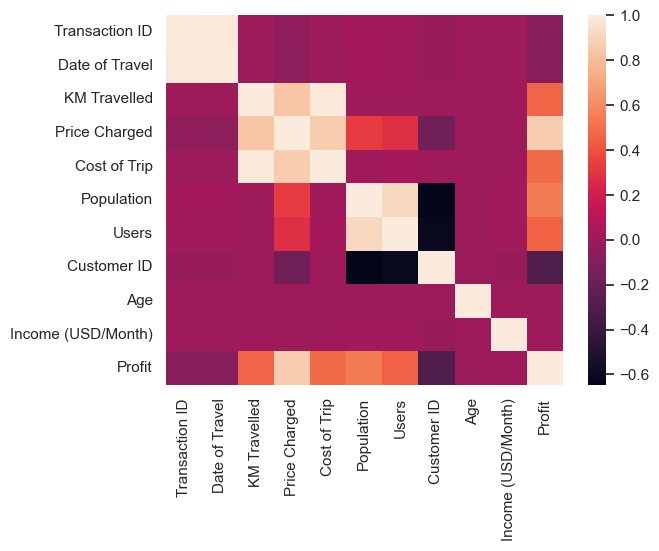

In [266]:
sns.heatmap(num_data.corr())
#sns.pairplot(data)

The Heatmap as well as Correlation Matrix are telling us `KM Travelled`, `Price Charged` and `Cost of Trip` are positively correlated.

Price Charged vs KM Travelled

Text(0.5, 1.0, 'Price Charged per KM Travelled')

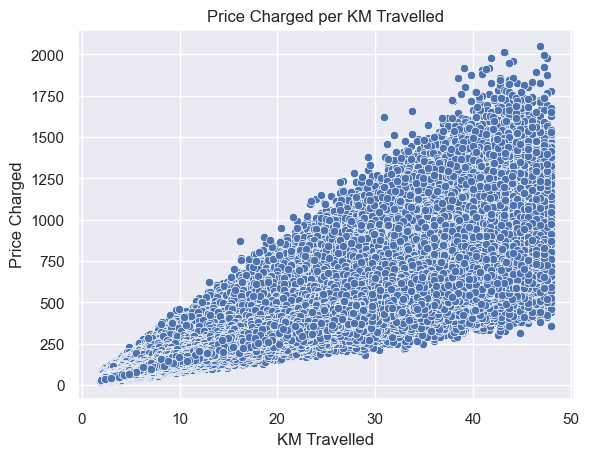

In [267]:
sns.scatterplot(data = master_data, x = 'KM Travelled', y='Price Charged')
plt.title("Price Charged per KM Travelled")

Cost of Trip vs KM Travelled

Text(0.5, 1.0, 'Cost of Trip per KM Travelled')

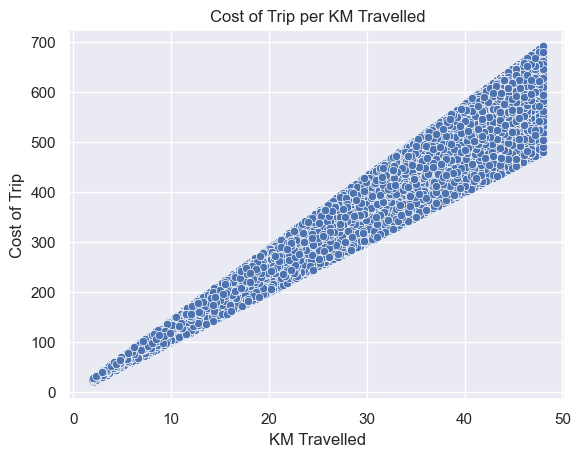

In [268]:
sns.scatterplot(data = master_data, x = 'KM Travelled', y='Cost of Trip')
plt.title("Cost of Trip per KM Travelled")

#### 3. Time Series 📊
I would like to create new features: `Days`, `months`, and `years`.
After this, I create a new data but similar to `master_data`. The only difference is that the index will be replaced by `Date of Travel`. Now, let's go and do it!

In [269]:
master_data['Year of Travel'] = master_data['Date of Travel'].dt.year
master_data['Month of Travel'] = master_data['Date of Travel'].dt.month
master_data['Day of Travel'] = master_data['Date of Travel'].dt.day

In [270]:
master_data_ts = master_data.set_index('Date of Travel')

### Profit Analysis (Yellow Cab versus Pink Cab)
I will group the sum profit of the 2 cab industries yearwise. 
I will group the sum price of the 2 cab industries yearwise.
Indeed, I will calculate the corresponding profit percentage.

Yearly profit

In [271]:
yearly_profit = master_data.groupby(['Company','Year of Travel']).Profit.sum().to_frame('Profit')
yearly_price = master_data.groupby(['Company', 'Year of Travel'])['Price Charged'].sum().to_frame('Price')
yearly_price['Profit'] = yearly_profit['Profit']
yearly_price['%Profit'] = yearly_price['Profit']*100 / yearly_price['Price']
yearly_price.head()

Price        Profit    %Profit
Company    Year of Travel                                      
Pink Cab   2016             7986269.04  1.739883e+06  21.785926
           2017             9530736.47  2.015101e+06  21.143179
           2018             8811245.82  1.552345e+06  17.617770
Yellow Cab 2016            38833629.82  1.407389e+07  36.241491
           2017            45582913.86  1.646427e+07  36.119383

In [272]:
total_profit = yearly_price.groupby(['Company'])['Profit'].sum().to_frame('Total Profit').reset_index()
total_profit

,Company,Total Profit
0,Pink Cab,5.307328e+06
1,Yellow Cab,4.402037e+07


Text(0.5, 1.0, 'Total Profit')

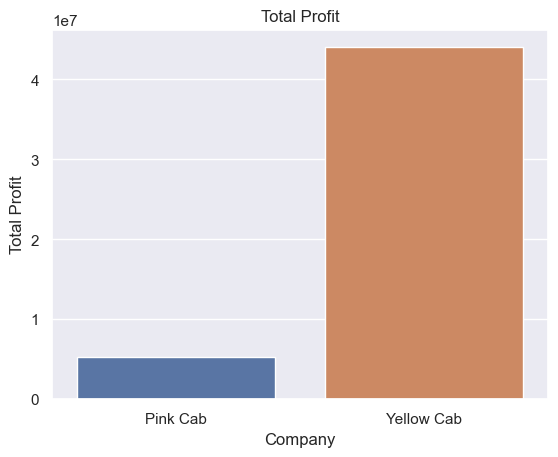

In [273]:
sns.barplot(total_profit, x="Company", y= 'Total Profit')
plt.title("Total Profit")

For the 3 years from 2016 to 2018, Yellow Cab has earned more profit than Pink Cab

,Company,Year of Travel,Price,Profit,%Profit
0,Pink Cab,2016,7986269.04,1.739883e+06,21.785926
1,Pink Cab,2017,9530736.47,2.015101e+06,21.143179
2,Pink Cab,2018,8811245.82,1.552345e+06,17.617770
3,Yellow Cab,2016,38833629.82,1.407389e+07,36.241491
4,Yellow Cab,2017,45582913.86,1.646427e+07,36.119383
5,Yellow Cab,2018,41437343.51,1.348222e+07,32.536399


Text(0.5, 0, 'Year')

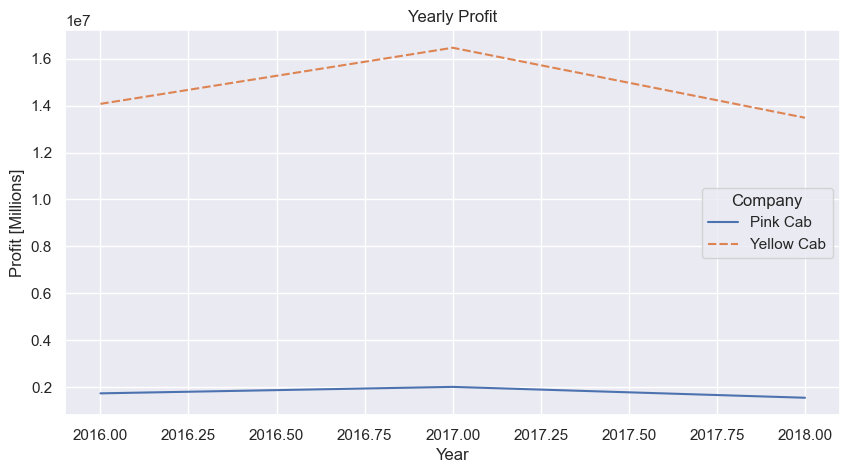

In [274]:
yearly_price = yearly_price.reset_index()
display(yearly_price)
plt.figure(figsize=(10, 5))
sns.lineplot(data = yearly_price, x='Year of Travel', y='Profit', hue= 'Company', style='Company')
plt.title("Yearly Profit")
plt.ylabel('Profit [Millions]')
plt.xlabel('Year')

Monthly Profit Analysis

,Company,Month of Travel,Profit
19,Yellow Cab,8,2.951513e+06
20,Yellow Cab,9,4.237495e+06
21,Yellow Cab,10,4.110229e+06
22,Yellow Cab,11,4.699833e+06
23,Yellow Cab,12,5.164226e+06


Text(0.5, 0, 'Month')

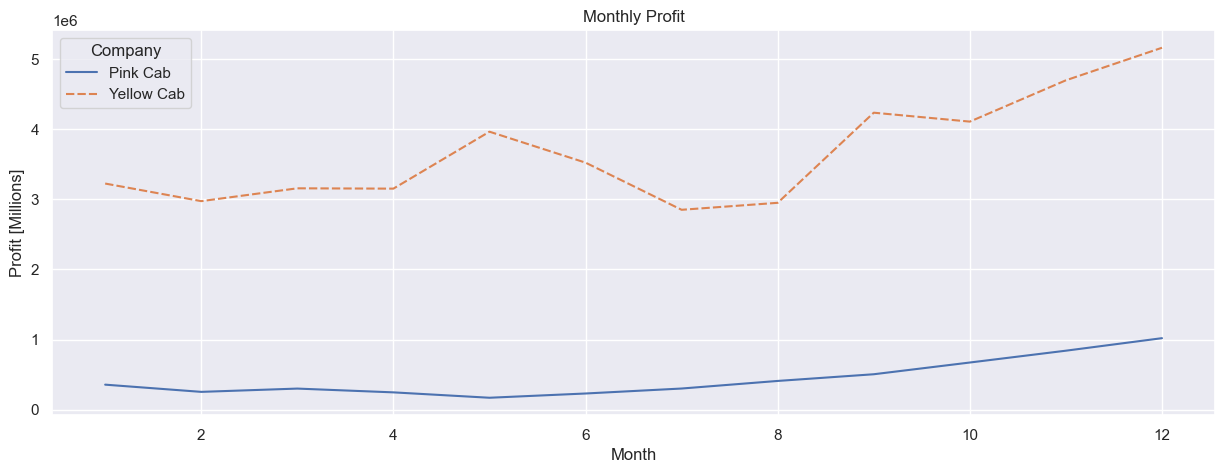

In [275]:
monthly_profit = master_data.groupby(['Company', 'Month of Travel'])['Profit'].sum().reset_index()
display(monthly_profit.tail())
plt.figure(figsize=(15, 5))
sns.lineplot(data = monthly_profit, x='Month of Travel', y='Profit', hue= 'Company', style='Company')
plt.title("Monthly Profit")
plt.ylabel('Profit [Millions]')
plt.xlabel('Month')

In [276]:
yellowcab = master_data[master_data['Company']=='Yellow Cab']
yellowcab_ts = master_data_ts[master_data_ts['Company']=='Yellow Cab']

pinkcab = master_data[master_data.Company.isin(['Pink Cab'])]
pinkcab_ts = master_data_ts[master_data_ts['Company']=='Pink Cab']

display(yellowcab.shape)
display(yellowcab_ts.shape)
display(pinkcab.shape)
display(pinkcab_ts.shape)

(274681, 18)

(274681, 17)

(84711, 18)

(84711, 17)

In [277]:
yy = yellowcab_ts['Profit'].resample("Y").sum()
yy = pd.DataFrame(yy)
display(yy)
py = pinkcab_ts["Profit"].resample('Y').sum()
py = pd.DataFrame(py)
display(py)

ym = yellowcab_ts['Profit'].resample('m').sum()
ym = pd.DataFrame(ym)
display(ym.head(2))

pm = pinkcab_ts['Profit'].resample('m').sum()
pm = pd.DataFrame(pm)
display(pm.head(2))

,Profit
Date of Travel,
2016-12-31,1.407389e+07
2017-12-31,1.646427e+07
2018-12-31,1.348222e+07


,Profit
Date of Travel,
2016-12-31,1739882.628
2017-12-31,2015100.657
2018-12-31,1552345.036


,Profit
Date of Travel,
2016-01-31,8.535861e+05
2016-02-29,1.007479e+06


,Profit
Date of Travel,
2016-01-31,74206.169
2016-02-29,88384.294


Profit per Rides yearwise and monthwise

In [278]:
yy['Profit_Rides'] = yy['Profit'] / yellowcab['Date of Travel'].value_counts().resample('Y').sum()
py['Profit_Rides'] = py['Profit'] / pinkcab['Date of Travel'].value_counts().resample('Y').sum()
display(yy)
display(py)
ym['Profit_Rides'] = ym['Profit'] / yellowcab['Date of Travel'].value_counts().resample('m').sum()
pm['Profit_Rides'] = pm['Profit'] / pinkcab['Date of Travel'].value_counts().resample('m').sum()
display(ym.head())
display(pm.head())

,Profit,Profit_Rides
Date of Travel,,
2016-12-31,1.407389e+07,169.693701
2017-12-31,1.646427e+07,168.416894
2018-12-31,1.348222e+07,143.450759


,Profit,Profit_Rides
Date of Travel,,
2016-12-31,1739882.628,68.810861
2017-12-31,2015100.657,66.714142
2018-12-31,1552345.036,53.124295


,Profit,Profit_Rides
Date of Travel,,
2016-01-31,8.535861e+05,224.332733
2016-02-29,1.007479e+06,215.457425
2016-03-31,9.181432e+05,176.430290
2016-04-30,1.018717e+06,183.354379
2016-05-31,1.208193e+06,210.817059


,Profit,Profit_Rides
Date of Travel,,
2016-01-31,74206.169,78.942733
2016-02-29,88384.294,83.856066
2016-03-31,88280.732,70.965219
2016-04-30,86058.292,66.608585
2016-05-31,57607.844,37.924848


Profit per KM yearwise and monthwise

In [279]:
yy['Profit_KM'] = yy['Profit']/yellowcab_ts['KM Travelled'].resample('Y').sum()
py['Profit_KM'] = py['Profit']/pinkcab_ts['KM Travelled'].resample('Y').sum()

ym['Profit_KM'] = ym['Profit']/yellowcab_ts['KM Travelled'].resample('m').sum()
pm['Profit_KM'] = pm['Profit']/pinkcab_ts['KM Travelled'].resample('m').sum()

display(yy)
display(py)
display(ym.head())
display(pm.head())

,Profit,Profit_Rides,Profit_KM
Date of Travel,,,
2016-12-31,1.407389e+07,169.693701,7.503564
2017-12-31,1.646427e+07,168.416894,7.465487
2018-12-31,1.348222e+07,143.450759,6.364322


,Profit,Profit_Rides,Profit_KM
Date of Travel,,,
2016-12-31,1739882.628,68.810861,3.062027
2017-12-31,2015100.657,66.714142,2.949786
2018-12-31,1552345.036,53.124295,2.353015


,Profit,Profit_Rides,Profit_KM
Date of Travel,,,
2016-01-31,8.535861e+05,224.332733,9.859264
2016-02-29,1.007479e+06,215.457425,9.554897
2016-03-31,9.181432e+05,176.430290,7.748110
2016-04-30,1.018717e+06,183.354379,8.046155
2016-05-31,1.208193e+06,210.817059,9.441918


,Profit,Profit_Rides,Profit_KM
Date of Travel,,,
2016-01-31,74206.169,78.942733,3.485438
2016-02-29,88384.294,83.856066,3.763082
2016-03-31,88280.732,70.965219,3.121490
2016-04-30,86058.292,66.608585,3.029135
2016-05-31,57607.844,37.924848,1.688006


In [280]:
print(f"The mean of monthly profit of YellowCab company is {round(ym['Profit'].mean(),1)}\
 and its standard deviation is {round(ym.Profit.std(),2)}, thus, the the percentage of\
 deviation is {round(ym.Profit.std()/ym.Profit.mean()*100, 2)}%. Whereas, the monthly\
 profit mean of PinkCab company is {round(pm['Profit'].mean(), 1)} and its standard\
 deviation is {round(pm['Profit'].std(), 2)}, so, the percentage of deviation is\
 {round(pm['Profit'].std()/pm.Profit.mean()*100, 2)}%.")

The mean of monthly profit of YellowCab company is 1222788.1 and its standard deviation is 282187.72, thus, the the percentage of deviation is 23.08%. Whereas, the monthly profit mean of PinkCab company is 147425.8 and its standard deviation is 90258.28, so, the percentage of deviation is 61.22%.


Once again, we can see that the monthly earnings of Yello Cab company is more stable with a fluctation of 23% whereas 
that of Pink Cab company is less stable with a fluctation of 61%. 

Yearly Profit over Rides

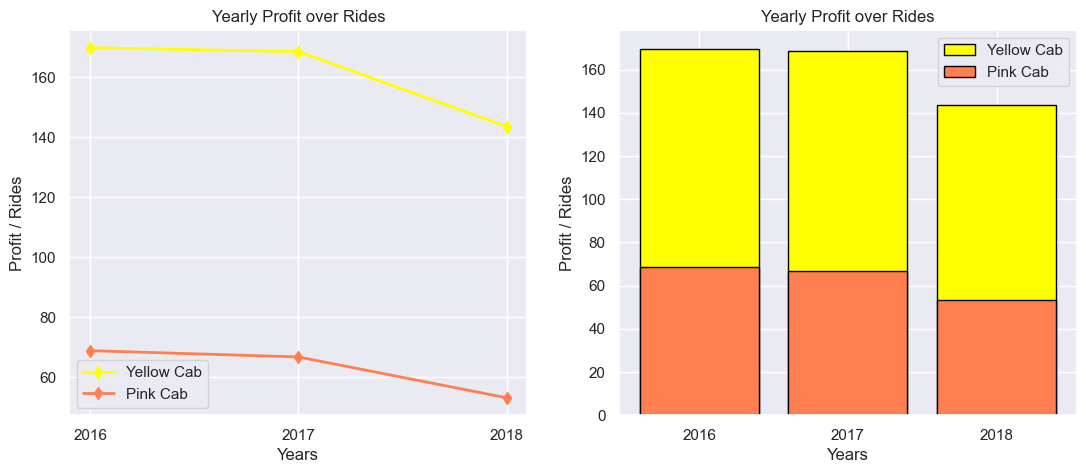

In [281]:
plt.figure(figsize=(13, 5))

plt.subplot(1,2,2)
a = yy['Profit_Rides']
b = py["Profit_Rides"]

plt.bar(data = yy, x=a.index.strftime("%Y"), height ='Profit_Rides', color='yellow', label= 'Yellow Cab', edgecolor='black')
plt.bar(data = py, x=b.index.strftime('%Y'), height ='Profit_Rides', color='coral', label= 'Pink Cab', edgecolor='black')
plt.xticks(rotation=0)
plt.title("Yearly Profit over Rides")
plt.xlabel("Years")
plt.ylabel("Profit / Rides")
plt.legend()

plt.subplot(1,2,1)
a = yy['Profit_Rides']
b = py["Profit_Rides"]
plt.plot(a.index.strftime("%Y"), 'Profit_Rides', data = yy, color='yellow', label= 'Yellow Cab', linewidth=2,marker='d')
plt.plot(b.index.strftime('%Y'), 'Profit_Rides', data = py, color='coral', label= 'Pink Cab', linewidth=2,marker='d')
plt.xticks(rotation=0)
plt.title("Yearly Profit over Rides")
plt.xlabel("Years")
plt.ylabel("Profit / Rides")
plt.legend()

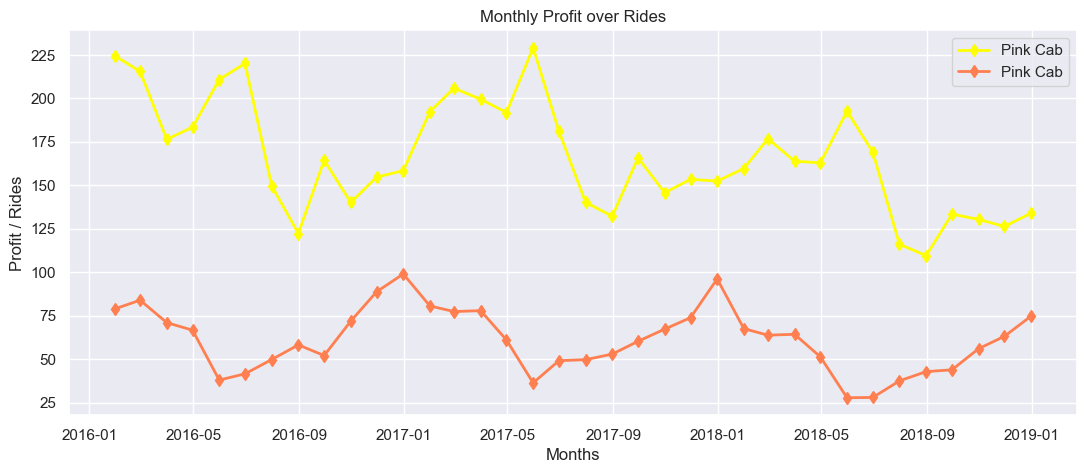

In [282]:
plt.figure(figsize=(13, 5))


a = ym['Profit_Rides']
b = pm["Profit_Rides"]
plt.plot(a.index, 'Profit_Rides', data = ym, color='yellow', label= 'Pink Cab', linewidth=2,marker='d')
plt.plot(b.index, 'Profit_Rides', data = pm, color='coral', label= 'Pink Cab', linewidth=2,marker='d')
plt.xticks(rotation=0)
plt.title("Monthly Profit over Rides")
plt.xlabel("Months")
plt.ylabel("Profit / Rides")
plt.legend()

Profit per KM yearwise

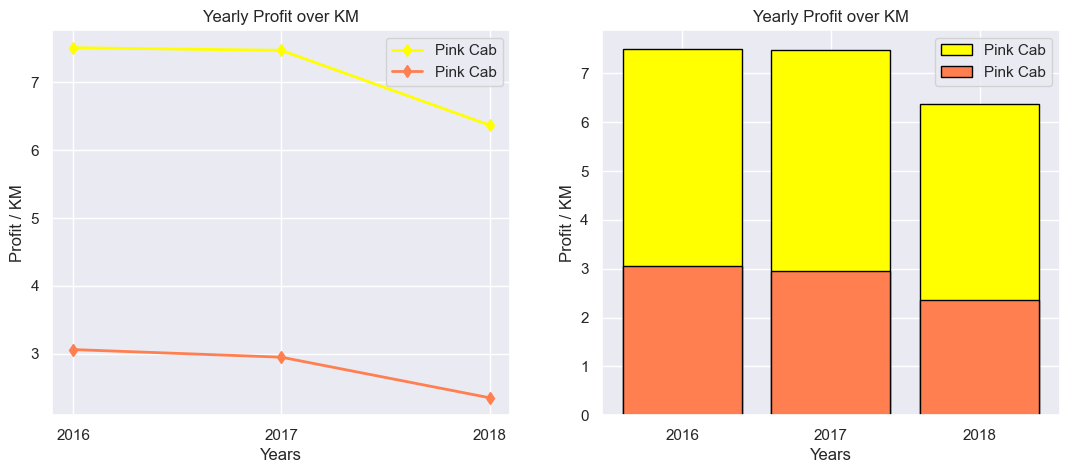

In [283]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
a = yy['Profit_KM']
b = py['Profit_KM']
plt.plot(a.index.strftime('%Y'), 'Profit_KM', data= yy, color='yellow', label= 'Pink Cab', linewidth=2,marker='d')
plt.plot(b.index.strftime('%Y'), 'Profit_KM', data = py, color='coral', label= 'Pink Cab', linewidth=2,marker='d')
plt.title("Yearly Profit over KM")
plt.xlabel('Years')
plt.ylabel('Profit / KM')
plt.legend()

plt.subplot(1,2,2)
a = yy['Profit_KM']
b = py['Profit_KM']
plt.bar(a.index.strftime('%Y'), height='Profit_KM', data= yy, color='yellow', label= 'Pink Cab', edgecolor='black')
plt.bar(b.index.strftime('%Y'), height='Profit_KM', data = py, color='coral', label= 'Pink Cab', edgecolor='black')
plt.title("Yearly Profit over KM")
plt.xlabel('Years')
plt.ylabel('Profit / KM')
plt.legend()



Profit per KM monthwise

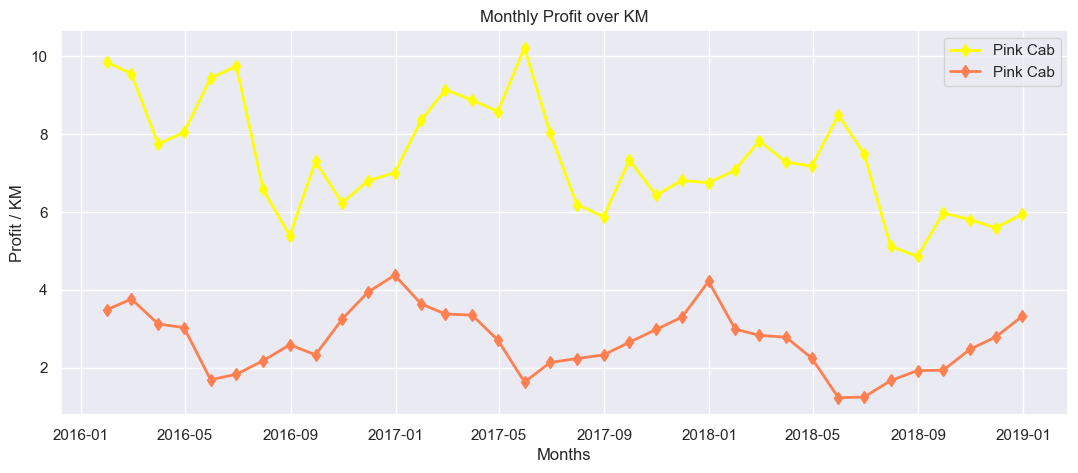

In [284]:
plt.figure(figsize=(13,5))

a = ym['Profit_KM']
b = pm["Profit_KM"]
plt.plot(a.index, 'Profit_KM', data = ym, color='yellow', label= 'Pink Cab', linewidth=2,marker='d')
plt.plot(b.index, 'Profit_KM', data = pm, color='coral', label= 'Pink Cab', linewidth=2,marker='d')
plt.xticks(rotation=0)
plt.title("Monthly Profit over KM")
plt.xlabel("Months")
plt.ylabel("Profit / KM")
plt.legend()

In [285]:
ask = master_data.groupby(['Company', 'Month of Travel'])['Transaction ID'].agg(['count']).reset_index()
ask = ask.sort_values(by = 'count', ascending= True)
ask.head()

,Company,Month of Travel,count
1,Pink Cab,2,3392
3,Pink Cab,4,4140
2,Pink Cab,3,4228
0,Pink Cab,1,4825
4,Pink Cab,5,5023


In [286]:
plt.figure(figsize=(13, 5))



<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

In [287]:
master_data.shape

(359392, 18)

In [289]:
master_data['Date of Travel'].describe()

count                           359392
mean     2017-08-16 01:37:55.042294016
min                2016-01-01 00:00:00
25%                2016-11-22 00:00:00
50%                2017-09-09 00:00:00
75%                2018-05-11 00:00:00
max                2018-12-30 00:00:00
Name: Date of Travel, dtype: object